In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from PIL import Image
import matplotlib.image as mpimg


In [2]:
#Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec) 
# basal cell carcinoma (bcc)
# benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)
# dermatofibroma (df)
# melanoma (mel)
# melanocytic nevi (nv) 
# vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)

lesion_types = {
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions ',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
     'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}

In [3]:
#base_skin_dir = os.path.join('', 'input')
#print((os.path.join(base_skin_dir, '*', '*.jpg')))

# Merging images from both folders HAM10000_images_part1.zip and HAM10000_images_part2.zip into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob.glob(os.path.join('*','*.jpg'))}

In [4]:
imageid_path_dict

{'_0_1039899': 'aug_train\\_0_1039899.jpg',
 '_0_1074689': 'aug_train\\_0_1074689.jpg',
 '_0_1214211': 'aug_train\\_0_1214211.jpg',
 '_0_1236858': 'aug_train\\_0_1236858.jpg',
 '_0_1282497': 'aug_train\\_0_1282497.jpg',
 '_0_1373602': 'aug_train\\_0_1373602.jpg',
 '_0_1376588': 'aug_train\\_0_1376588.jpg',
 '_0_1419521': 'aug_train\\_0_1419521.jpg',
 '_0_1469852': 'aug_train\\_0_1469852.jpg',
 '_0_1539782': 'aug_train\\_0_1539782.jpg',
 '_0_1605447': 'aug_train\\_0_1605447.jpg',
 '_0_1704657': 'aug_train\\_0_1704657.jpg',
 '_0_1773322': 'aug_train\\_0_1773322.jpg',
 '_0_1839752': 'aug_train\\_0_1839752.jpg',
 '_0_1939307': 'aug_train\\_0_1939307.jpg',
 '_0_1969710': 'aug_train\\_0_1969710.jpg',
 '_0_198430': 'aug_train\\_0_198430.jpg',
 '_0_1985331': 'aug_train\\_0_1985331.jpg',
 '_0_205843': 'aug_train\\_0_205843.jpg',
 '_0_2087013': 'aug_train\\_0_2087013.jpg',
 '_0_2121381': 'aug_train\\_0_2121381.jpg',
 '_0_2157546': 'aug_train\\_0_2157546.jpg',
 '_0_2210101': 'aug_train\\_0_221010

In [5]:
skin_df = pd.read_csv("HAM10000_metadata.csv")

In [6]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
def add_image_path(x):
    #print(imageid_path_dict.get(x))
    return imageid_path_dict.get(x)
skin_df['image_path'] = skin_df['image_id'].apply(add_image_path)

In [8]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,train_all\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,train_all\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,train_all\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,train_all\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,train_all\ISIC_0031633.jpg


In [9]:
skin_df= skin_df[[c for c in skin_df if c not in ['dx']] 
       + ['dx']]

In [10]:
skin_df.head()

,lesion_id,image_id,dx_type,age,sex,localization,image_path,dx
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,train_all\ISIC_0027419.jpg,bkl
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,train_all\ISIC_0025030.jpg,bkl
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,train_all\ISIC_0026769.jpg,bkl
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,train_all\ISIC_0025661.jpg,bkl
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,train_all\ISIC_0031633.jpg,bkl


In [11]:
skin_df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [12]:
skin_df['age'].min()

0.0

In [13]:
skin_df['age'].value_counts()

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(skin_df['dx'])

le.classes_

#le.transform(skin_df['dx'])

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

In [14]:
skin_df.head()

,lesion_id,image_id,dx_type,age,sex,localization,image_path,dx
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,train_all\ISIC_0027419.jpg,bkl
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,train_all\ISIC_0025030.jpg,bkl
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,train_all\ISIC_0026769.jpg,bkl
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,train_all\ISIC_0025661.jpg,bkl
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,train_all\ISIC_0031633.jpg,bkl


In [15]:
skin_df['target']=le.transform(skin_df['dx'])

In [16]:
skin_df.head()

,lesion_id,image_id,dx_type,age,sex,localization,image_path,dx,target
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,train_all\ISIC_0027419.jpg,bkl,2
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,train_all\ISIC_0025030.jpg,bkl,2
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,train_all\ISIC_0026769.jpg,bkl,2
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,train_all\ISIC_0025661.jpg,bkl,2
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,train_all\ISIC_0031633.jpg,bkl,2


In [17]:
skin_df.isna().sum().sum()

57

In [18]:
skin_df.isna().sum()

lesion_id        0
image_id         0
dx_type          0
age             57
sex              0
localization     0
image_path       0
dx               0
target           0
dtype: int64

In [19]:
#fit by mean
mean = np.mean(skin_df['age'])
skin_df['age'] = skin_df['age'].fillna(mean)

In [20]:
skin_df.isna().sum()

lesion_id       0
image_id        0
dx_type         0
age             0
sex             0
localization    0
image_path      0
dx              0
target          0
dtype: int64

In [21]:
skin_df.dtypes

lesion_id        object
image_id         object
dx_type          object
age             float64
sex              object
localization     object
image_path       object
dx               object
target            int32
dtype: object

[Text(0, 0.5, 'Number of samples in each type'),
 Text(0.5, 0, 'Type of lesion'),
 Text(0.5, 1.0, 'Number of samples of each lesion type')]

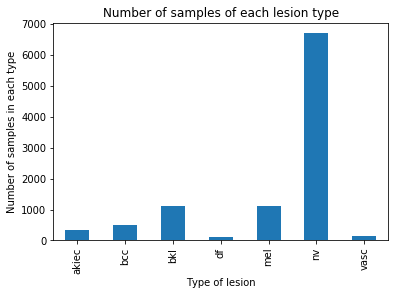

In [22]:
skin_df.groupby(['dx'])['lesion_id'].count().plot(kind='bar').set(title='Number of samples of each lesion type',xlabel='Type of lesion',ylabel='Number of samples in each type')

In [23]:
skin_df['age'].corr(skin_df['target'])

-0.4266595966762652

In [24]:
skin_df.corr()

,age,target
age,1.00000,-0.42666
target,-0.42666,1.00000


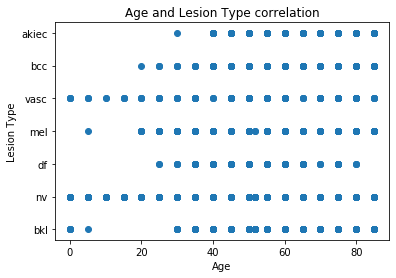

In [25]:
plt.scatter(skin_df['age'],skin_df['dx'])
plt.xlabel('Age')
plt.ylabel('Lesion Type')
plt.title('Age and Lesion Type correlation')
plt.show()

In [26]:
#Not common under the age of 20


[Text(0, 0.5, 'Number of samples in each type'),
 Text(0.5, 0, 'Type of lesion for each sex'),
 Text(0.5, 1.0, 'Number of samples of each lesion type based on sex')]

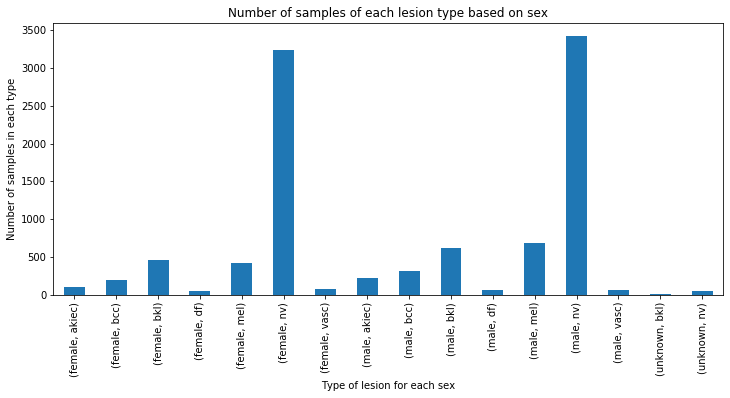

In [27]:
skin_df.groupby(['sex','dx'])['lesion_id'].count().plot(kind='bar',figsize=(12,5)).set(title='Number of samples of each lesion type based on sex',xlabel='Type of lesion for each sex',ylabel='Number of samples in each type')

[Text(0, 0.5, 'Number of samples in each type'),
 Text(0.5, 0, 'Type of lesion for each localization'),
 Text(0.5, 1.0, 'Number of samples of each lesion type based on localization')]

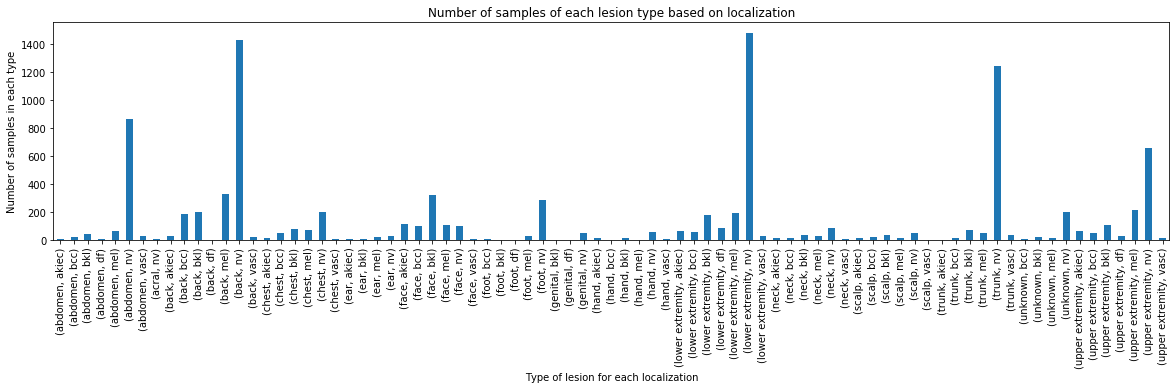

In [28]:
skin_df.groupby(['localization','dx'])['lesion_id'].count().plot(kind='bar',figsize=(20,4)).set(title='Number of samples of each lesion type based on localization',xlabel='Type of lesion for each localization',ylabel='Number of samples in each type')

[Text(0, 0.5, 'Number of samples in each type'),
 Text(0.5, 0, 'Localization'),
 Text(0.5, 1.0, 'Number of samples based on localization')]

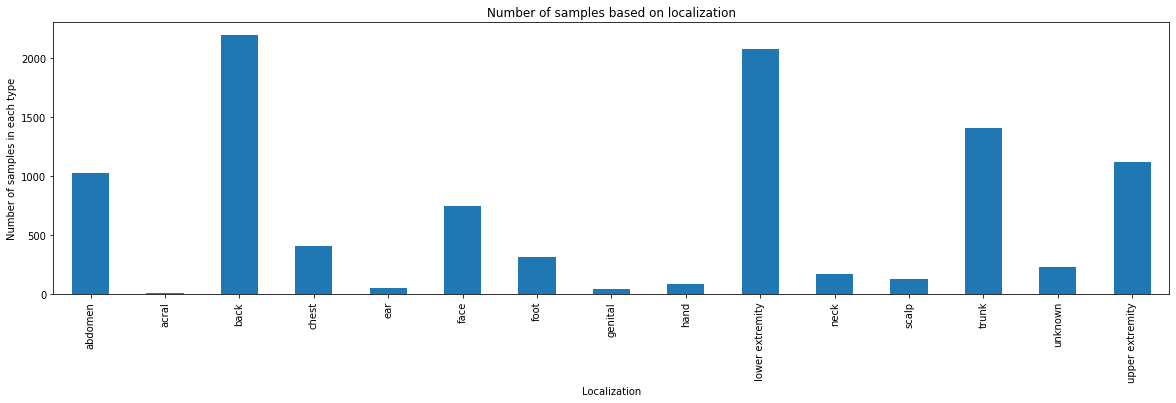

In [29]:
skin_df.groupby(['localization'])['dx'].count().plot(kind='bar',figsize=(20,5)).set(title='Number of samples based on localization',xlabel='Localization',ylabel='Number of samples in each type')

In [30]:
skin_df['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

[Text(0, 0.5, 'Number of samples in each type'),
 Text(0.5, 0, 'Type of lesion for each localization'),
 Text(0.5, 1.0, 'Number of samples of each lesion type based on localization')]

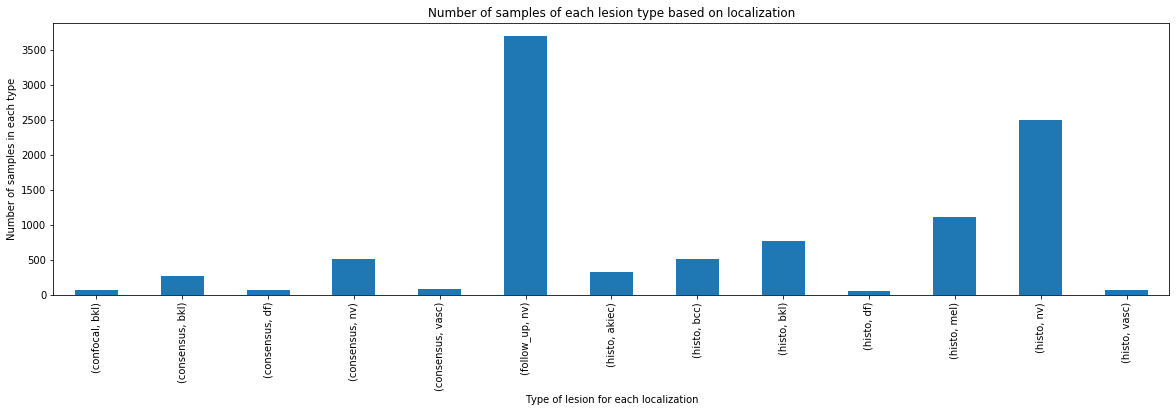

In [31]:
skin_df.groupby(['dx_type','dx'])['lesion_id'].count().plot(kind='bar',figsize=(20,5)).set(title='Number of samples of each lesion type based on localization',xlabel='Type of lesion for each localization',ylabel='Number of samples in each type')

In [32]:
skin_df.to_csv('skin.csv')

In [41]:
import os 
directory = os.listdir('train')
for name in directory:
    print(name)

akiec
bcc
bkl
df
mel
nv
vasc


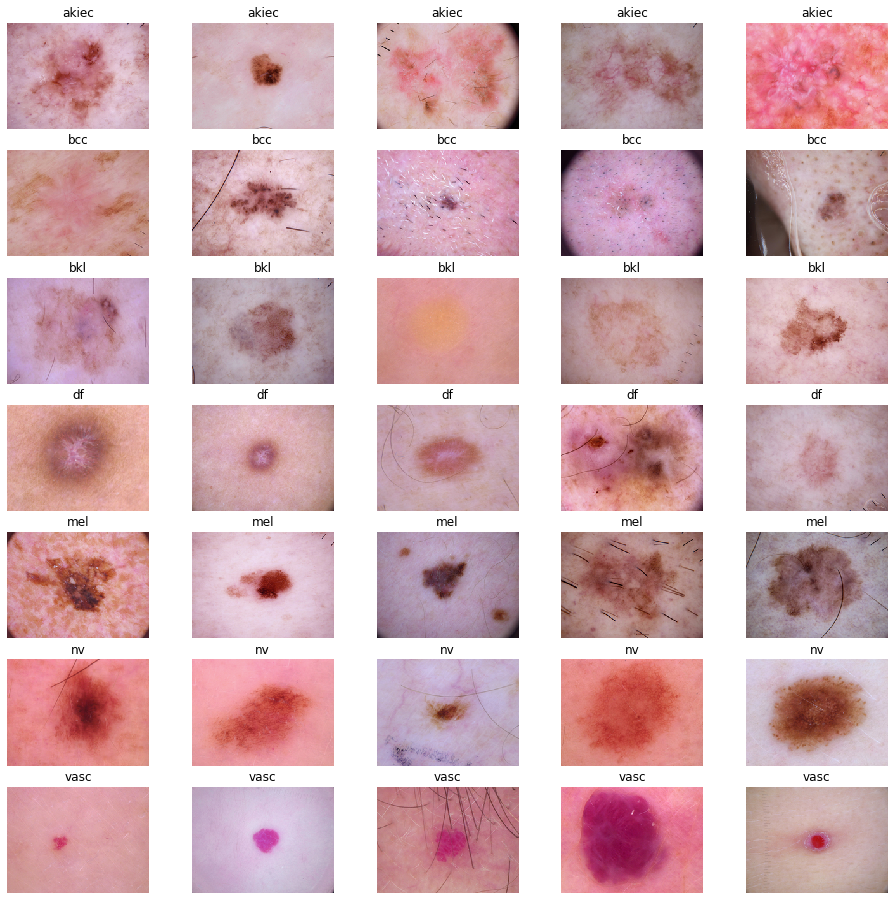

In [101]:

k=1
fig = plt.figure(figsize=(16,16))

for j in range(len(directory)):
    
    i=1
    for filename in glob.glob('train/'+directory[j]+'/*.jpg'):
        
       
        if i <= 5:
            
            img = Image.open(filename)
            img.thumbnail((224, 224), Image.ANTIALIAS) 
       
            fig.add_subplot(7,5,k) 
           
            plt.imshow(img)
            plt.title(directory[j])
            plt.axis('off')
            
            k=k+1
            i=i+1
        else:
            
            break
plt.show()